# 1D Plots Tutorial<a id='top'></a>

This tutorial is for creating 1D lines plot using [CDAT](https://uvcdat.llnl.gov)'s VCS.


© Software was developed by Charles Doutriaux and CDAT team, and tutorial was written by Charles Doutriaux (January 2018)

## Contents: 
([Top](#top))
- [Create VCS canvas](#vcs)
- [Prepare input data](#input)
- [Basic Plot](#basic)
- [Basic Controls](#basic_controls)
- [Altering the X axis](#xaxis)
- [Altering the Y axis](#yaxis)
- [Beautifying the plot some more via templates](#beauty)
- [Multiple Lines](#multi)
- [Other types of 1D plots](#other)
  - [Flipping the axes (x(y) vs y)](#xyvsy)
  - [Scatter Plots](#scatter)

## Create VCS canvas<a id='vcs'></a>
([Top](#top))

In [1]:
import vcs
x = vcs.init(bg=True,geometry=(800,600))

## Prepare input data<a id='input'></a>
([Top](#top))

Let's start with simple sine function

In [2]:
import numpy
angle = numpy.arange(0, 360, 10) # in degrees
s = numpy.sin(angle/180.*numpy.pi) # sin takes radians as input

## Very Basic Plot<a id="basic"></a>
([Top](#top))

In its most basic form VCS does not need anything else to plot:

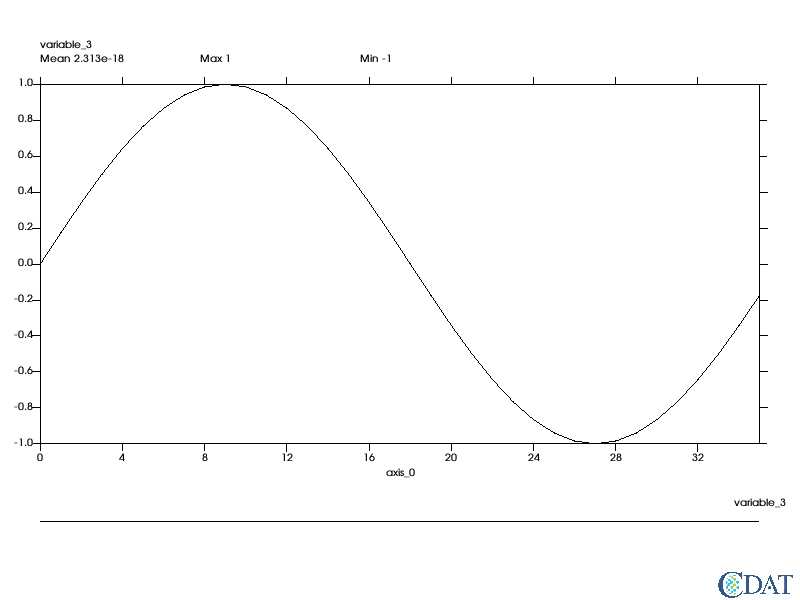

In [3]:
x.plot(s)

##  Basic Controls <a id="basic"></a>
([Top](#top))

Let's change the color of the line and size aspect and size of the markers.

For this we will need to create a **1D graphic method** and alter some of its attributes

The following is list of available markers

<img src="test_vcs_markers_uniform.png">


In [4]:
line = vcs.create1d()
line.list()  # List what we can change

---------- Yxvsx (GYx) member (attribute) listings ----------
graphics method = G1d
name = __1d_263737865552086
projection = linear
xticlabels1 = *
xticlabels2 = *
xmtics1 = 
xmtics2 = 
yticlabels1 = *
yticlabels2 = *
ymtics1 =  
ymtics2 =  
datawc_x1 = 1e+20
datawc_y1 =  1e+20
datawc_x2 =  1e+20
datawc_y2 =  1e+20
datawc_timeunits =  days since 2000
datawc_calendar =  135441
xaxisconvert =  linear
yaxisconvert =  linear
linetype =  solid
linecolor =  [0.0, 0.0, 0.0, 100.0]
linewidth =  1
marker =  dot
markercolor =  [0.0, 0.0, 0.0, 100.0]
markersize =  1
flip =  False


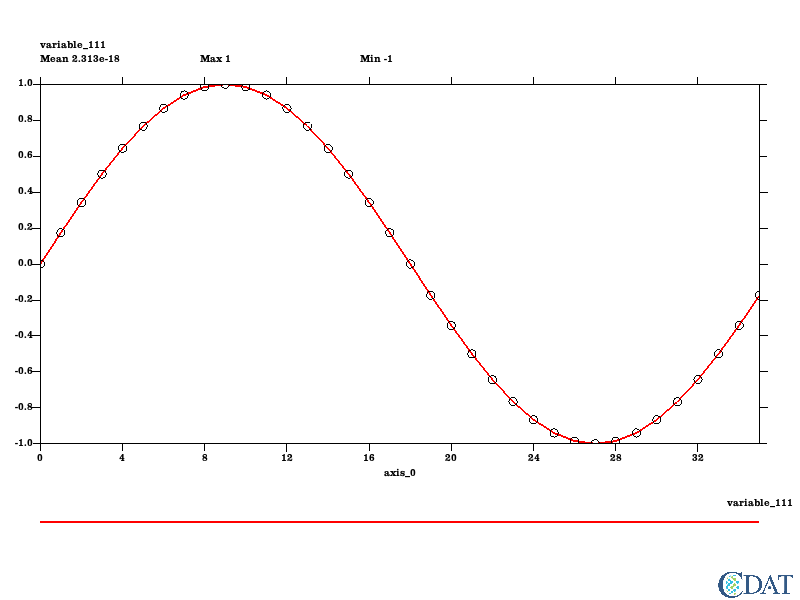

In [5]:
line.linecolor = "red"  # Red color obviously
line.linewidth = 2.  # A bit thicker
line.marker = "circle"  #
line.markersize = 1.25  # A bit bigger
x.clear() # Let's clear the first plot
x.switchfonts("default","Clarendon")
x.plot(s,line)

## Altering X Axis<a id="xaxis"></a>
([Top](#top))

We would like the axis to be shown in radians, since `s` is a pure array the *x* axis is seen by vcs as 0 to 35

Let's create a dictionary to show a few X points

0 -> 0
45degrees = 4.5 in our units = $\pi/4$

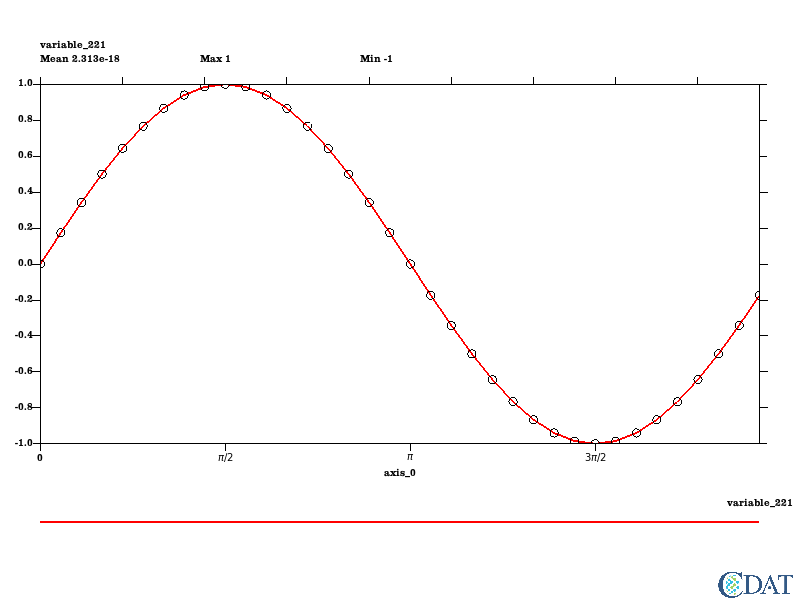

In [6]:
angles = {0:'0',9:r'$\pi/2$',18:r'$\pi$', 27:r'$3\pi/2$',36:r'$2\pi$'}
line.xticlabels1 = angles
x.clear()
x.plot(s,line)

But we would like to have the axis labeled "angle" rather than `axis_0` so we need to make s a transient variable

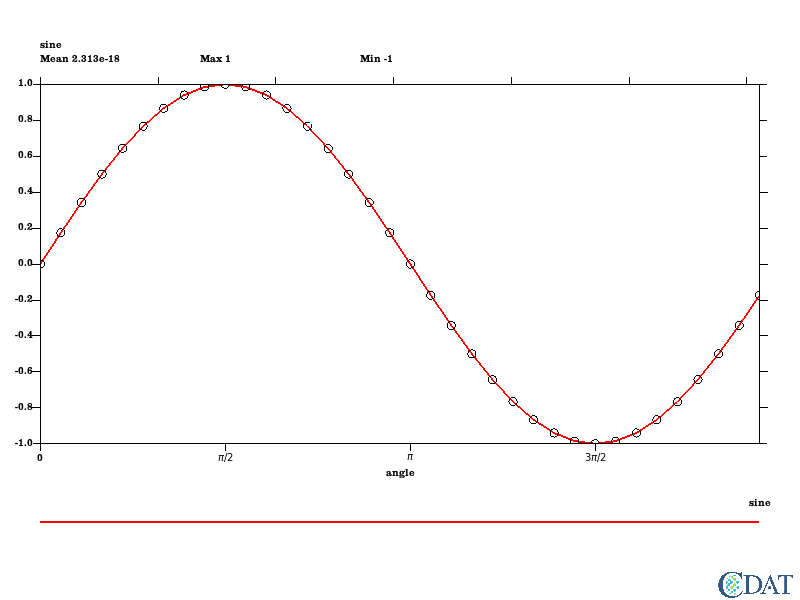

In [7]:
import MV2
s = MV2.array(s)
s.id = "sine"
xaxis = s.getAxis(0)
xaxis.id = "angle"
xaxis.units="radians"
# let's make them radians as well
xaxis[:] = xaxis[:]/18.*numpy.pi
# That means we need to match or symbols to new values
angles = {0:'0',numpy.pi/2.:r'$\pi/2$',numpy.pi:r'$\pi$', 3*numpy.pi/2.:r'$3\pi/2$',2*numpy.pi:r'$2\pi$'}
line.xticlabels1 = angles
x.clear()
x.plot(s,line)

The last point being exactly 2$pi$ it is not drawn let's extend our *x axis* a bit
Also by default it is using the first and last value to determine the x values, this can be an issue when plotting multiple line (with different x ref for example).

We recommend setting the x range manually

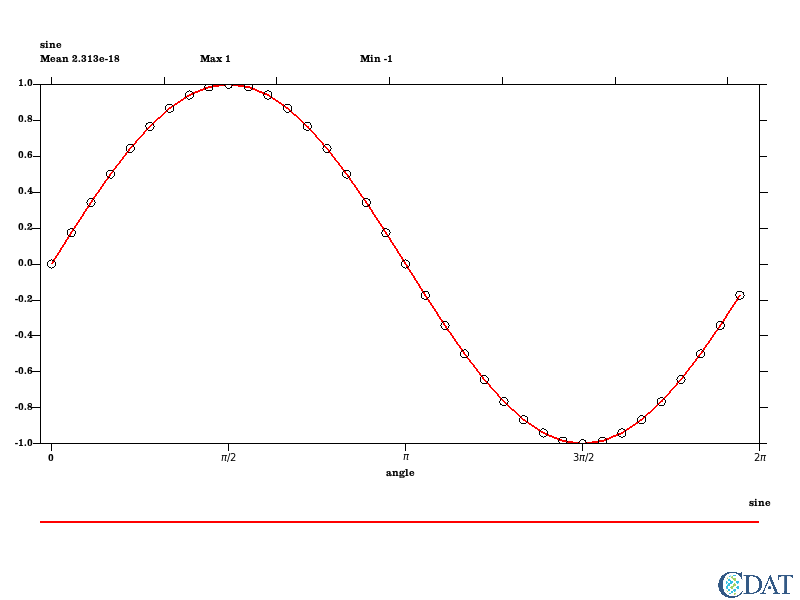

In [8]:
line.datawc_x1 = -0.1
line.datawc_x2 = numpy.pi*2.000001
x.clear()
x.plot(s,line)

## Altering Y Axis<a id="yaxis"></a>
([Top](#top))

We can also tweak the y axis, by default it is using the max and min of the data it is plotting.
If you have mutliple line plot this can be an issue as min/max will change with each plot.

We recommend setting the y range manually

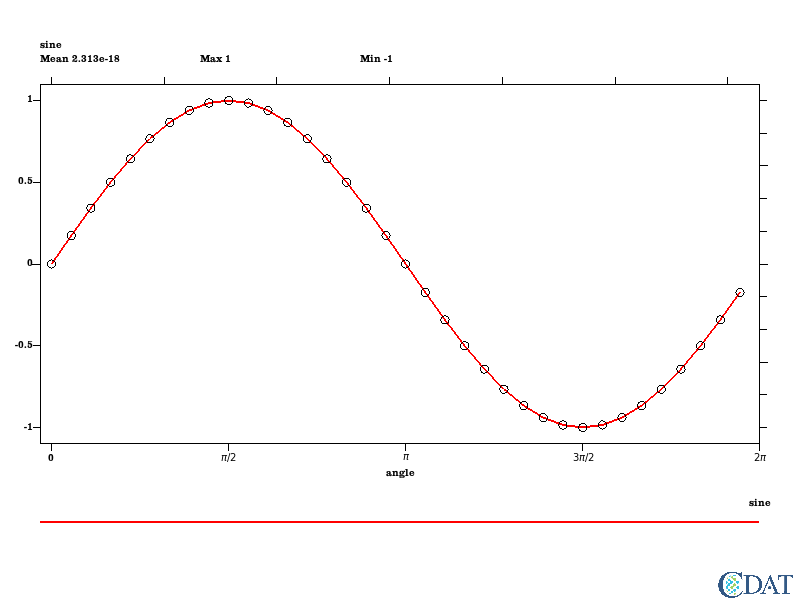

In [9]:
line.datawc_y1 = -1.1
line.datawc_y2 = 1.1
line.yticlabels1 = {-1.:"-1",-.5:"-0.5",0:"0",.5:"0.5",1:"1"}
x.clear()
x.plot(s,line)

## Beautifying the plot some more via templates<a id="beauty"></a>
([Top](#top))

Let's draw thick line at tickmarks and dotted ones in between


In [10]:
tmpl = vcs.createtemplate()

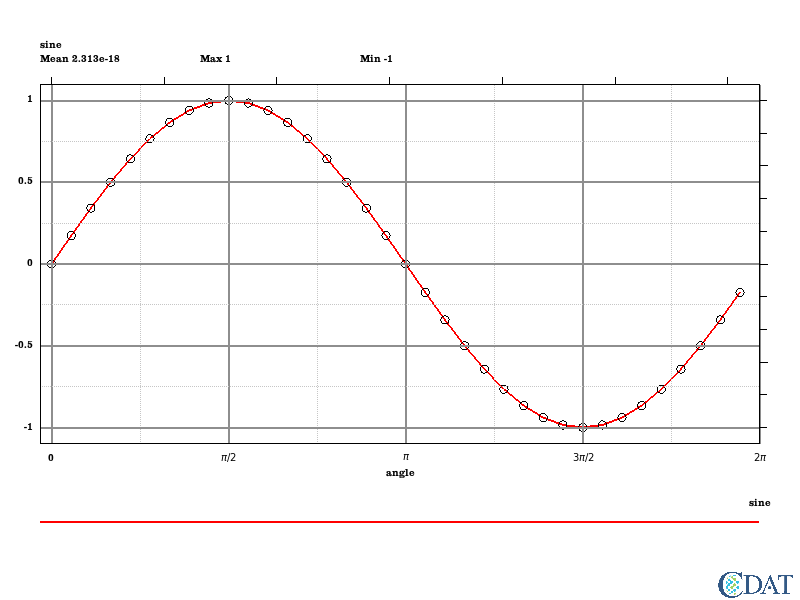

In [11]:
thick = vcs.createline()  # for thick ticks
thick.width = 1.5  # A bit thicker
thick.color = [[56,56,56]]
dots = vcs.createline()  # for thin/sub ticks
dots.type = ["dot"]
dots.color = [[78,78,78]]
tmpl.xtic1.y2 = tmpl.data.y2  # Ticks extends all the way accross the data section
tmpl.xtic1.line = thick
tmpl.xmintic1.y2 = tmpl.data.y2  # Ticks extends all the way accross the data section
tmpl.xmintic1.priority = 1
tmpl.xmintic1.line = dots
tmpl.ytic1.x2 = tmpl.data.x2  # Ticks extends all the way accross the data section
tmpl.ytic1.line = thick
tmpl.ymintic1.x2 = tmpl.data.x2  # Ticks extends all the way accross the data section
tmpl.ymintic1.priority = 1
tmpl.ymintic1.line = dots
line.xmtics1 = {numpy.pi/4.:"",3*numpy.pi/4:"",5*numpy.pi/4:"",7*numpy.pi/4:""}
line.ymtics1 = {-.75:"", -.25:"", .25:"", .75:""}
x.clear()
x.plot(s,line,tmpl)

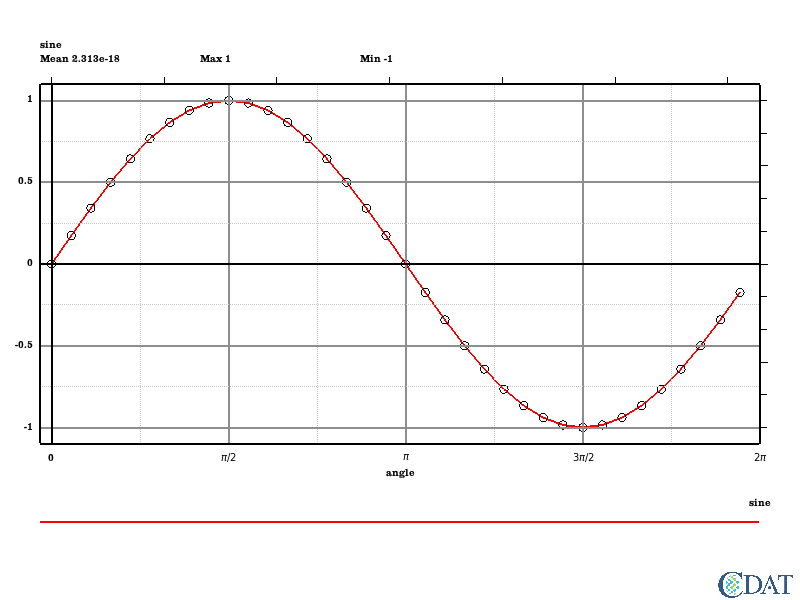

In [12]:
black = vcs.createline()
black.width = 2.
tmpl.ymintic2.line = black
tmpl.ymintic2.x1 = tmpl.data.x1
tmpl.ymintic2.x2 = tmpl.data.x2
tmpl.ymintic2.priority = 2  # To be sure it's on top
tmpl.xmintic2.line = black
tmpl.xmintic2.y1 = tmpl.data.y1
tmpl.xmintic2.y2 = tmpl.data.y2
tmpl.xmintic2.priority = 2  # To be sure it's on top
line.ymtics2 = {0:""}
line.xmtics2 = {0:""}
tmpl.box1.line = black  # make outer box match thick line
x.clear()
x.plot(s, tmpl, line)

## Multiple Lines<a id="multi"></a>
([Top](#top))

Let's plot multiple lines 

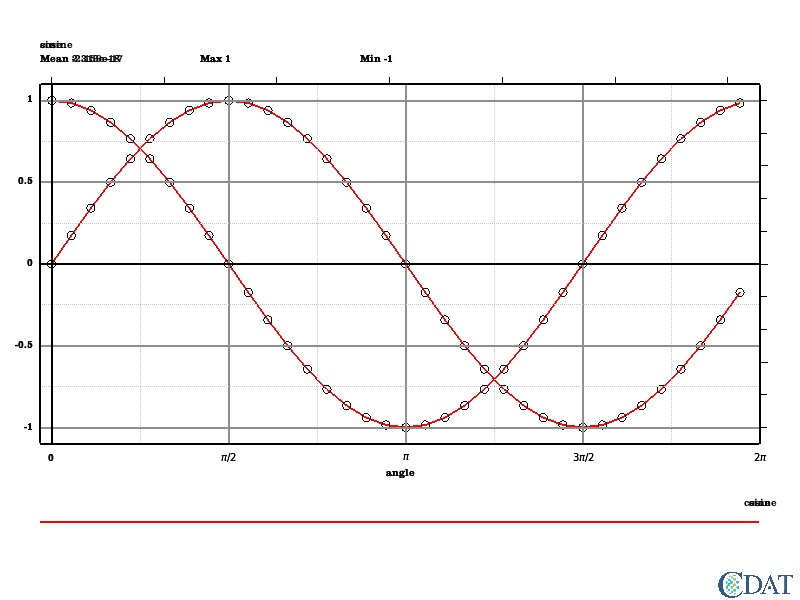

In [13]:
c = MV2.cos(angle/180.*numpy.pi)
c.id = "cosine"
c.setAxis(0,xaxis)

x.clear()
x.plot(s,tmpl,line)
x.plot(c,line,tmpl)  # order does not matter

We are almost there but we need to blank a few attributes on template (name, min, max, etc.. and legend)
Also we need a different color for the cosine

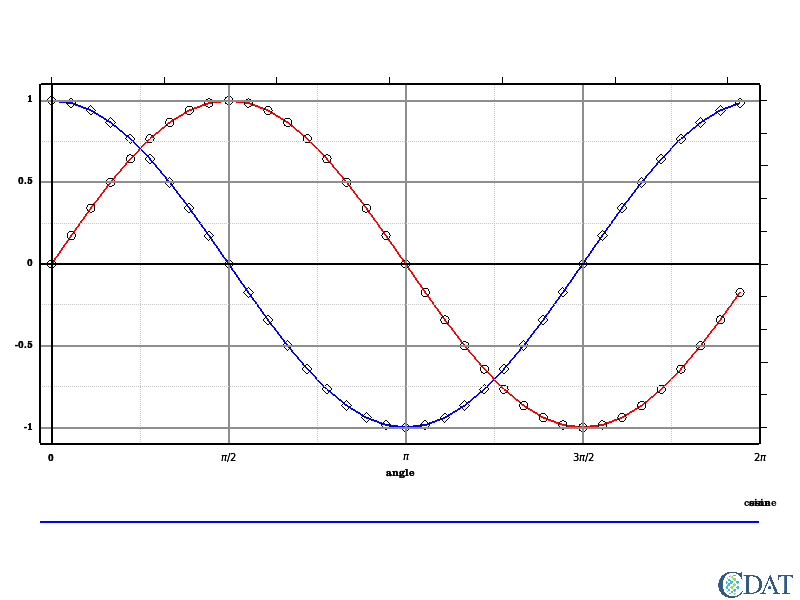

In [14]:
tmpl.blank(["dataname","min","mean","max"])
line_cos = vcs.create1d(source=line)
line_cos.linecolor = "blue"
line_cos.marker = "diamond"
line_cos.markersize = 1.5
line_cos.markercolor = "black"
x.clear()
x.plot(s,tmpl,line)
x.plot(c,tmpl,line_cos)

Ok now we still have to tweak the legend, templates have a built in function for this

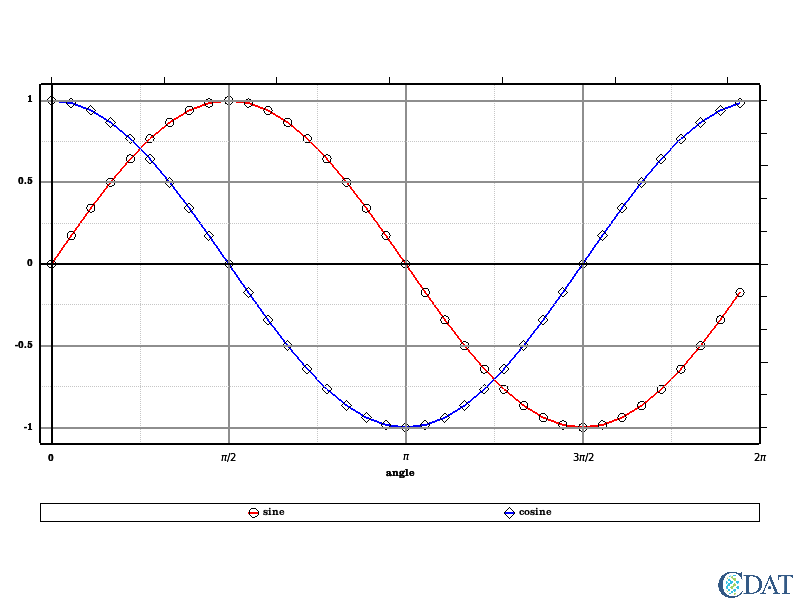

In [15]:
# First let's blank the legend default
x.clear()
tmpl.legend.priority=1  # Make sure it is on
tmpl.drawLinesAndMarkersLegend(x, [line.linecolor, line_cos.linecolor], 
                               [line.linetype, line_cos.linetype],
                               [line.linewidth,line_cos.linewidth],
                               [line.markercolor, line_cos.markercolor],
                               [line.marker, line_cos.marker],
                               [line.markersize, line_cos.markersize],
                               [s.id, c.id])
tmpl.legend.priority=0
x.plot(s,tmpl,line)
x.plot(c,tmpl,line_cos)



And finally let's use to template to beautify a bit more

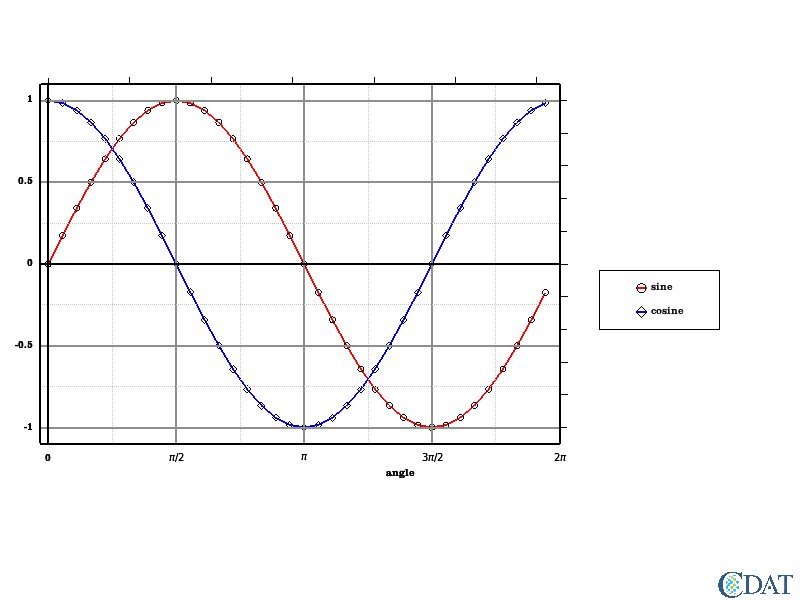

In [16]:
x2 = .7
tmpl.data.x2 = x2
# We also need to move the other things linked to it
tmpl.box1.x2= x2
tmpl.ymintic1.x2 = x2
tmpl.ymintic2.x2 = x2
tmpl.ytic1.x2 = x2
tmpl.ytic2.x1 = x2
tmpl.ytic2.x2 = x2+.01

# Let's move the legend
tmpl.legend.x1 = x2+.05
tmpl.legend.x2 = .9
tmpl.legend.y1 = .45
tmpl.legend.y2 = .55

x.clear()
tmpl.legend.priority=1  # Make sure it is on
# Let's stack it vertically now
tmpl.drawLinesAndMarkersLegend(x, [line.linecolor, line_cos.linecolor], 
                               [line.linetype, line_cos.linetype],
                               [line.linewidth,line_cos.linewidth],
                               [line.markercolor, line_cos.markercolor],
                               [line.marker, line_cos.marker],
                               [line.markersize, line_cos.markersize],
                               [s.id, c.id],
                               stacking="vertical")
tmpl.legend.priority=0
x.plot(s,tmpl,line)
x.plot(c,tmpl,line_cos)

## Other types of 1D plots<a id="other"></a>
([Top](#top))

### Flipping axes (aka x(y) vs y or xyvsy)<a id=xyvsy></a>


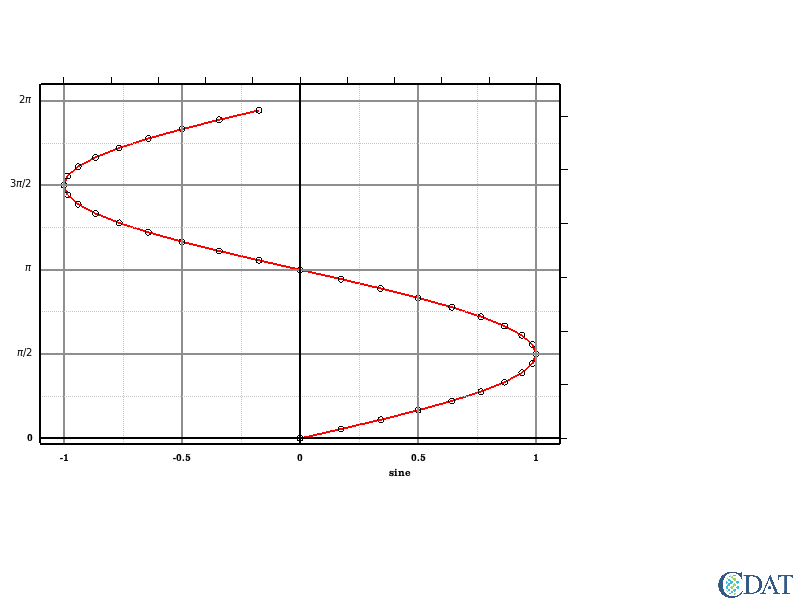

In [17]:
line_flip = vcs.create1d(source=line)
line_flip.flip = True
# Note that f = vcs.createxyvsy() creates a 1d plot with flip = True
def flip(gm, attr):
    tmp = getattr(gm, "x"+attr)
    setattr(gm, "x"+attr, getattr(gm,"y"+attr))
    setattr(gm, "y"+attr, tmp)
    
for att in ["mtics","ticlabels"]:
    for number in ["1", "2"]:
        flip(line_flip, att + number)

line_flip.datawc_x1 = -1.1
line_flip.datawc_x2 = 1.1
line_flip.datawc_y1 = -.1
line_flip.datawc_y2 = numpy.pi*2.1
x.clear()
x.plot(s,line_flip, tmpl)
    

### Scatter plots aka y vs x<a id=scatter></a>

Let's plot cosine vs sine

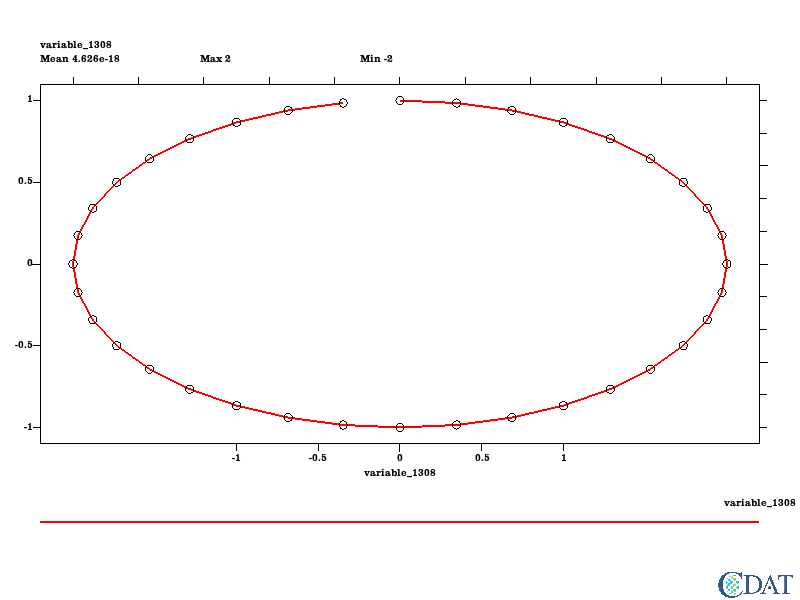

In [18]:
scatter = vcs.create1d(source=line)
scatter.datawc_x1 = -2.2
scatter.datawc_x2 = 2.2
scatter.xmtics1 = scatter.ymtics1
scatter.xmtics2 = scatter.ymtics2
scatter.xticlabels1 = scatter.yticlabels1
scatter.xticlabels2 = scatter.yticlabels2
x.clear()
# x values passed first
x.plot(2*s,c,scatter)

Let's turn off the lines

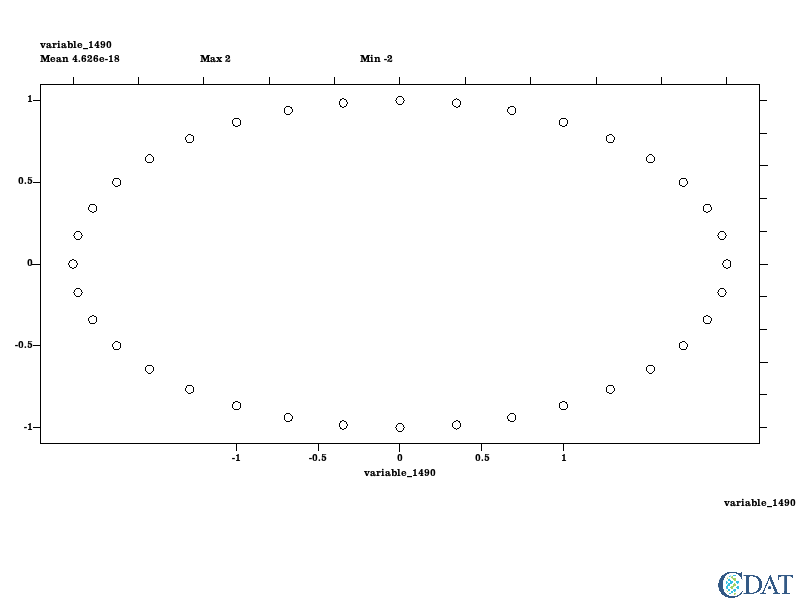

In [19]:
scatter.linecolor= [0,0,0,0]  # no opacity = transparent
x.clear()
# x values passed first
x.plot(2*s,c,scatter)

Or turn off the markers

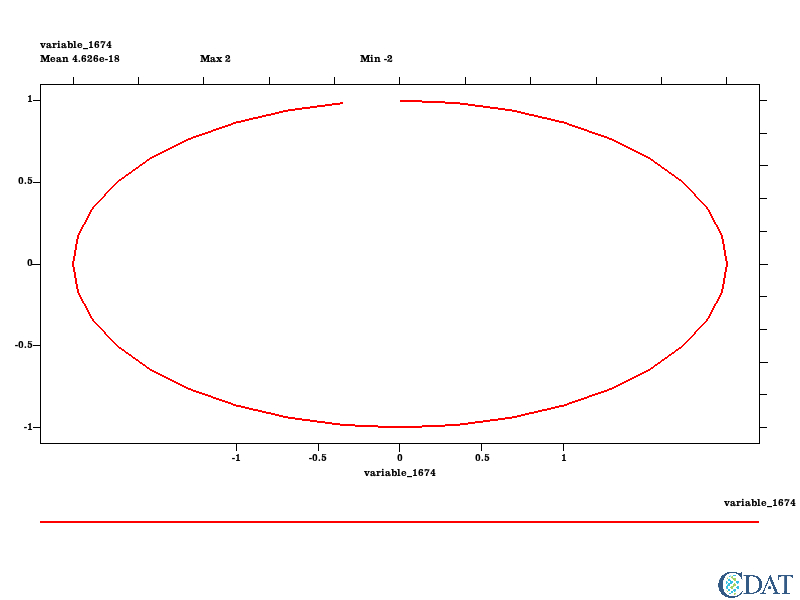

In [20]:
scatter.linecolor = "red"
scatter.markercolor = [0,0,0,0]
x.clear()
# x values passed first
x.plot(2*s,c,scatter)